In [54]:
# Import Dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.ensemble import BalancedBaggingClassifier,BalancedRandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier,VotingClassifier,StackingClassifier,RandomForestClassifier

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.model_selection import train_test_split,cross_val_score


In [55]:
# READ data
df = pd.read_csv('./train.csv')

In [56]:
# Head of the data
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [57]:
# Basic analysis of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [58]:
# Describe the data 
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


#### Data Cleaning
- [ ] Outliers in Age,Person Income,person_emp_lenght,loan_percent_income,cb_person_cred_hist_length

In [59]:
# Check Missing values
df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [60]:
# Data Cleaning

In [61]:
# Drop id columns since it is same as the index
df.drop(columns='id',inplace=True)

In [62]:
# Convert to binary values
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].eq('Y').astype(int)

In [63]:
# EDA

<Axes: ylabel='count'>

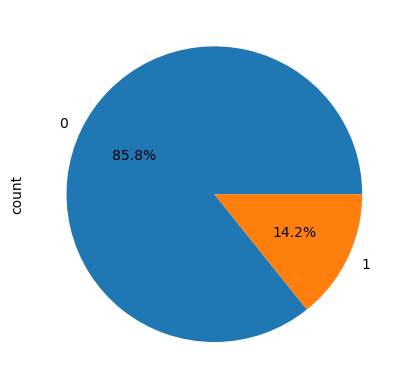

In [64]:
# Target Value Analysis
df['loan_status'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [65]:
# Univariate Analysis

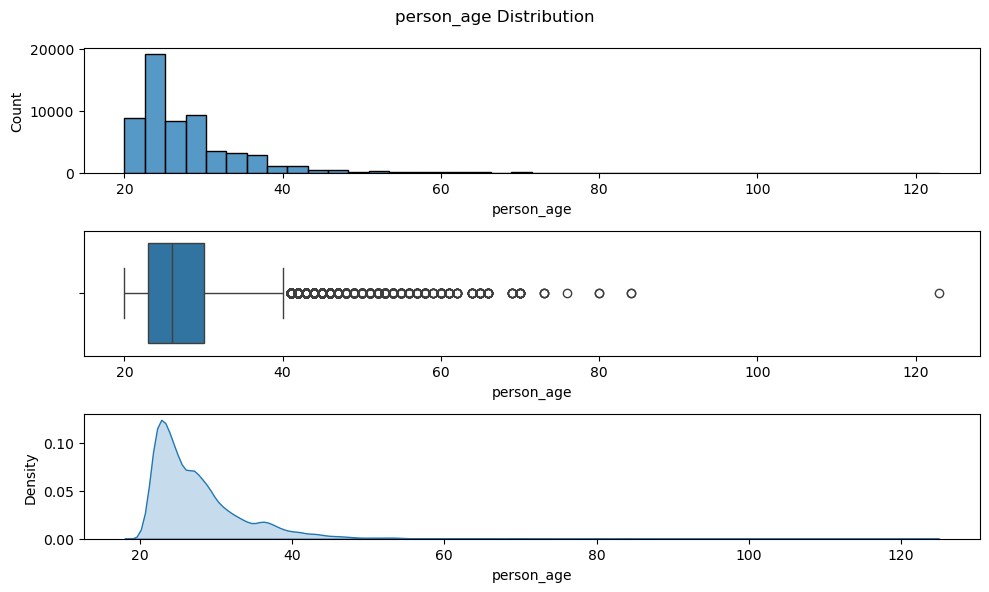

In [66]:
def num_plot(feature=''):
    plt.figure(figsize=(10,6))
    plt.suptitle(f'{feature} Distribution')
    plt.subplot(3,1,1)
    sns.histplot(df[feature],bins=40)
    plt.subplot(3,1,2)
    sns.boxplot(df[feature],orient='h')
    plt.subplot(3,1,3)
    sns.kdeplot(df[feature],fill=True)
    plt.tight_layout()
num_plot('person_age')

In [67]:
# dropping the dirty Outlier
age_outlier = df.query('person_age>90').index
df.drop(age_outlier,inplace=True)

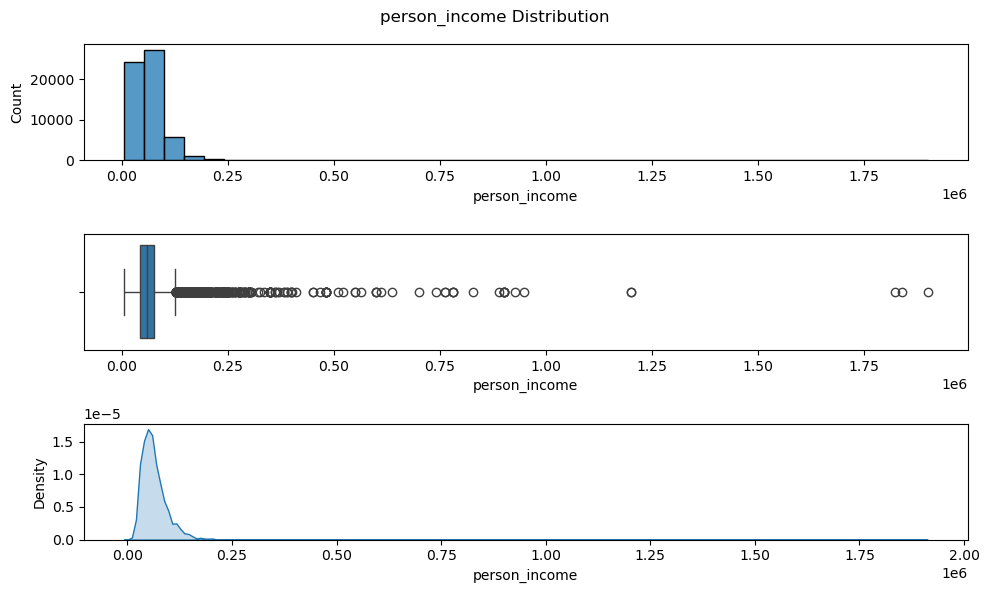

In [68]:
num_plot('person_income')

highly right skewed

<Axes: title={'center': 'Home_owner_ship count plot '}, xlabel='person_home_ownership'>

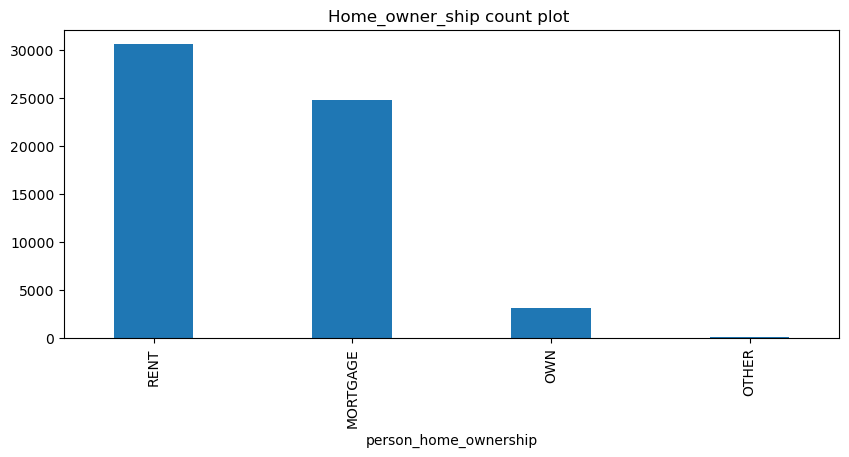

In [69]:
df['person_home_ownership'].value_counts().plot(kind='bar',figsize=(10,4),width=.4,title='Home_owner_ship count plot ')

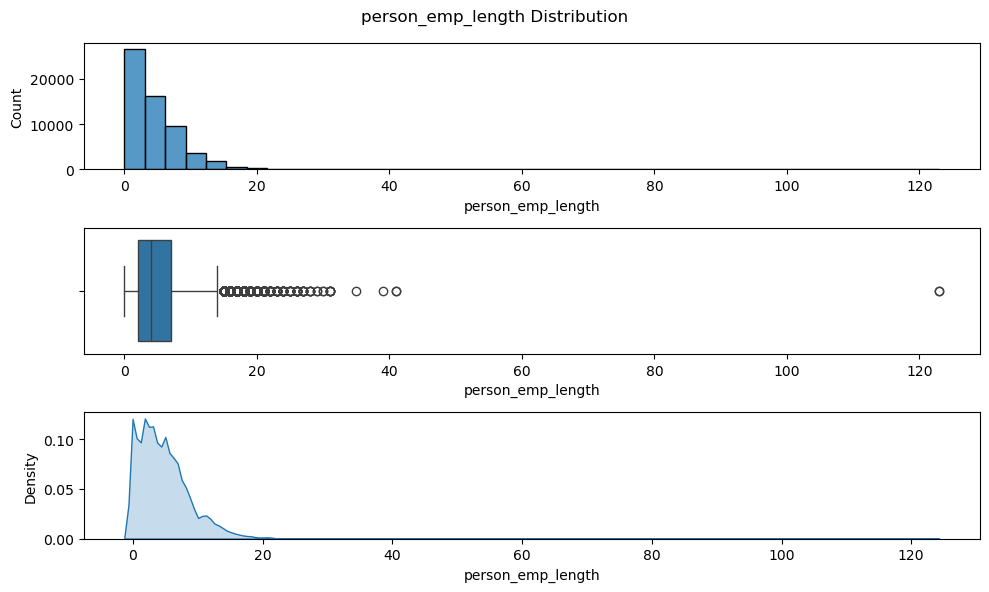

In [70]:
num_plot('person_emp_length')

In [71]:
# We should remove this dirty outlier
df.drop(df.query('person_emp_length>110').index,inplace=True)

<Axes: ylabel='count'>

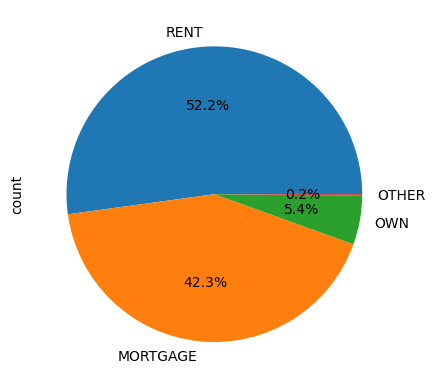

In [72]:
df['person_home_ownership'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: title={'center': 'Loan Grade Count Plot'}, xlabel='loan_grade'>

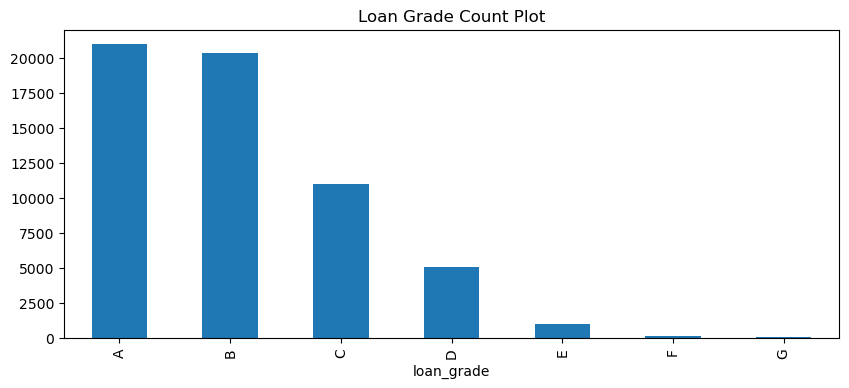

In [73]:
df['loan_grade'].value_counts().plot(kind='bar',figsize=(10,4),title="Loan Grade Count Plot")

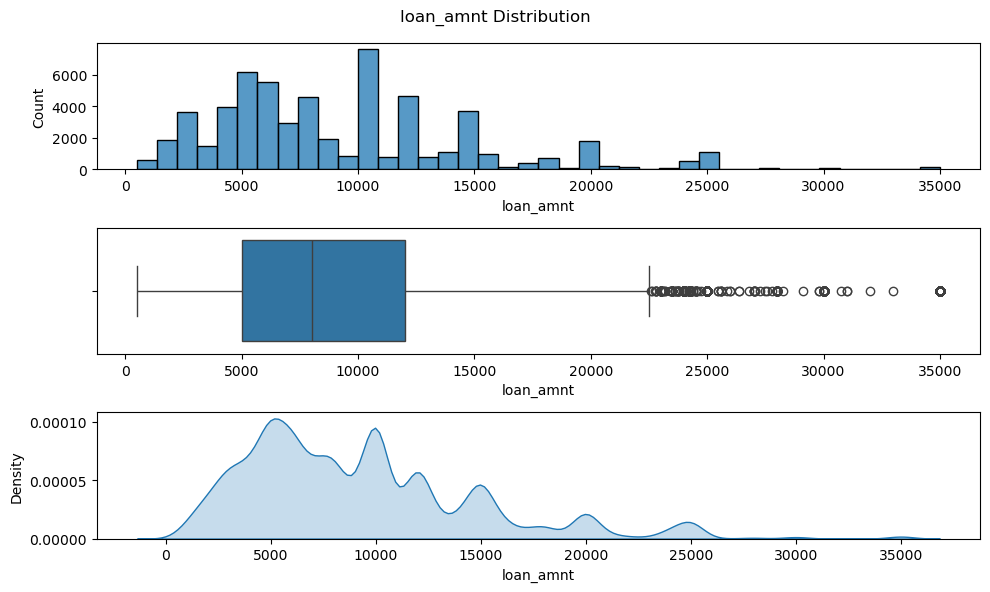

In [74]:
num_plot('loan_amnt')

<Axes: ylabel='count'>

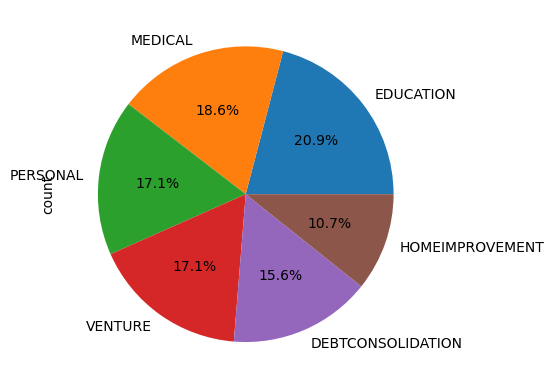

In [75]:
df['loan_intent'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: xlabel='loan_intent'>

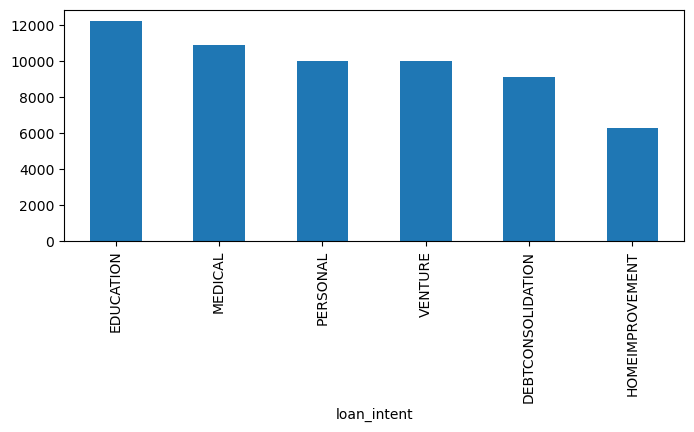

In [76]:
df['loan_intent'].value_counts().plot(kind='bar',figsize=(8,3))

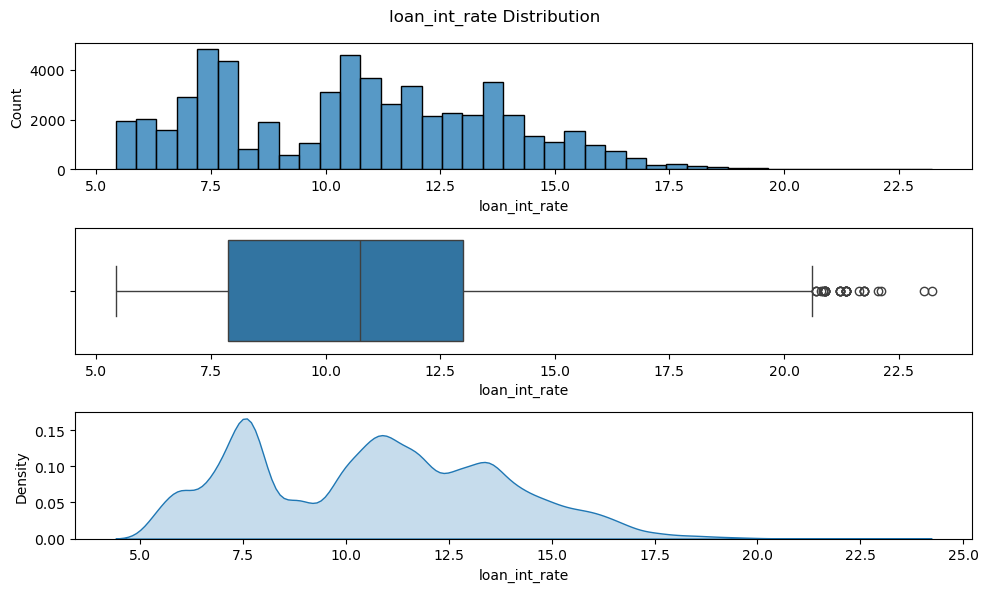

In [77]:
num_plot('loan_int_rate')

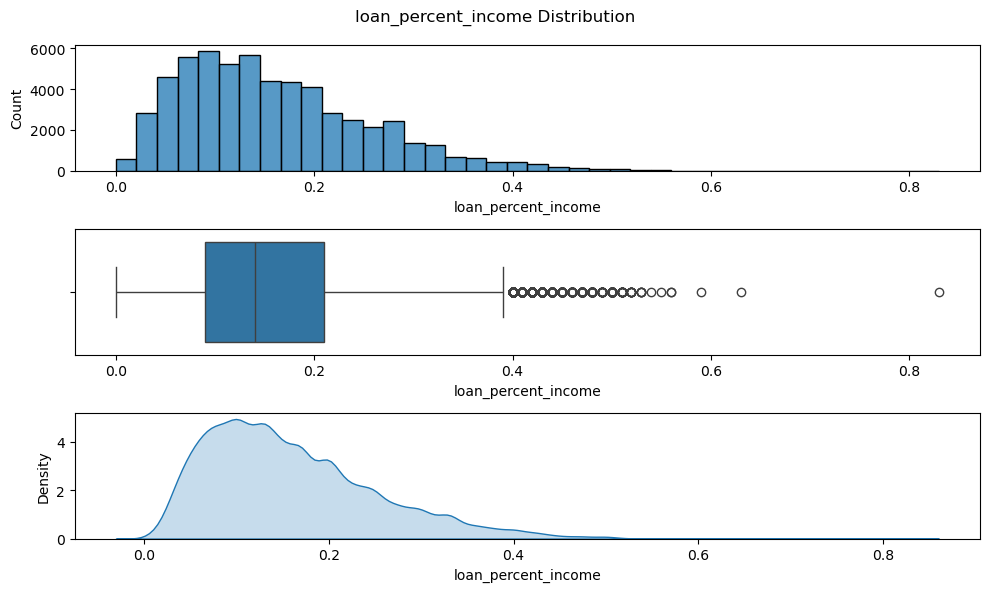

In [78]:
num_plot('loan_percent_income')

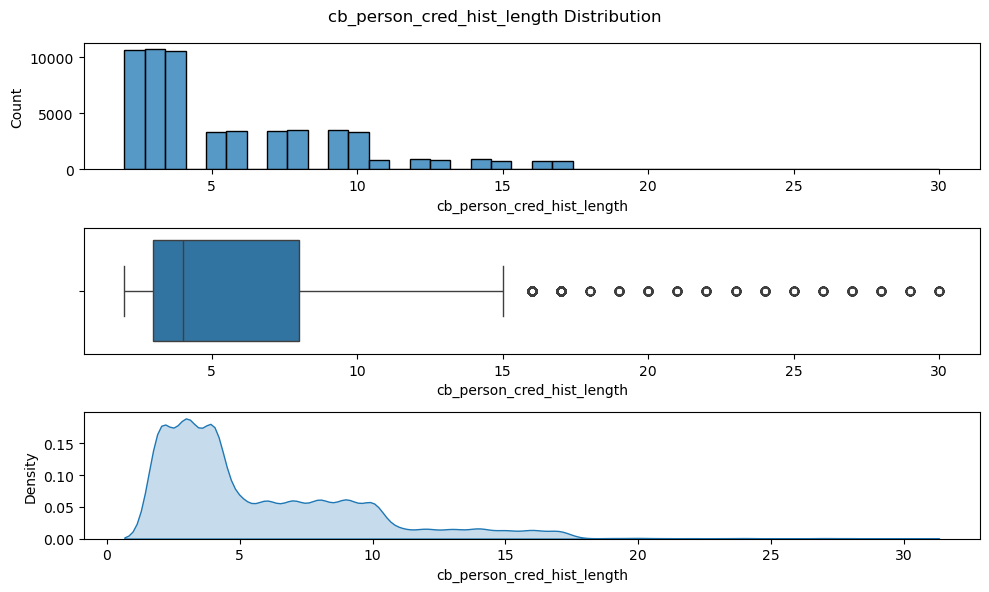

In [79]:
num_plot('cb_person_cred_hist_length')

<Axes: xlabel='cb_person_default_on_file', ylabel='count'>

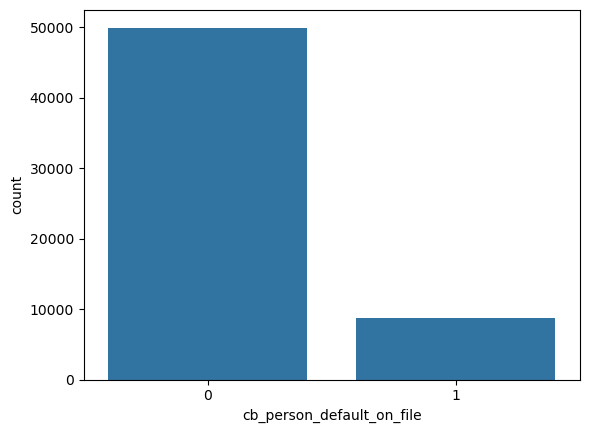

In [80]:
sns.countplot(x=df['cb_person_default_on_file'])

In [81]:
# Multivariate Analysis

<Axes: xlabel='loan_status', ylabel='person_age'>

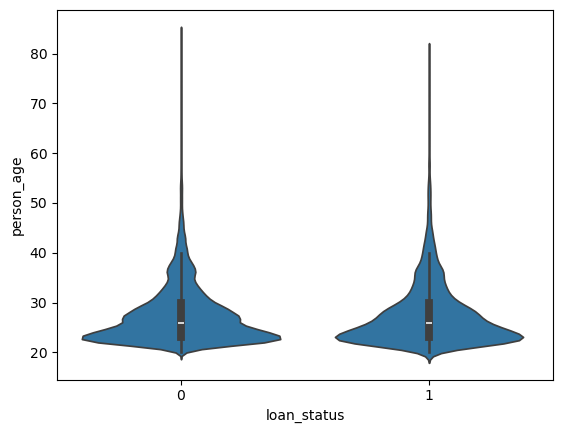

In [82]:
# Person age vs Loan Approval
sns.violinplot(y=df['person_age'],x=df['loan_status'])

<Axes: xlabel='loan_status', ylabel='person_income'>

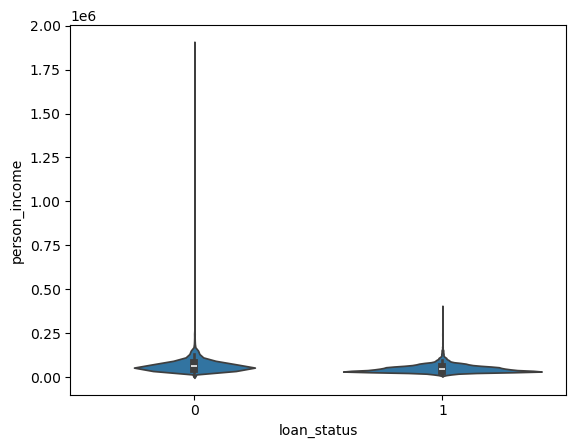

In [83]:
# Same for person income
sns.violinplot(y=df['person_income'],x=df['loan_status'])

In [84]:
pd.crosstab(df['loan_intent'],df['loan_status'],normalize='index')

loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,0.810687,0.189313
EDUCATION,0.892266,0.107734
HOMEIMPROVEMENT,0.826274,0.173726
MEDICAL,0.821824,0.178176
PERSONAL,0.867199,0.132801
VENTURE,0.907193,0.092807


<Axes: xlabel='loan_status', ylabel='person_emp_length'>

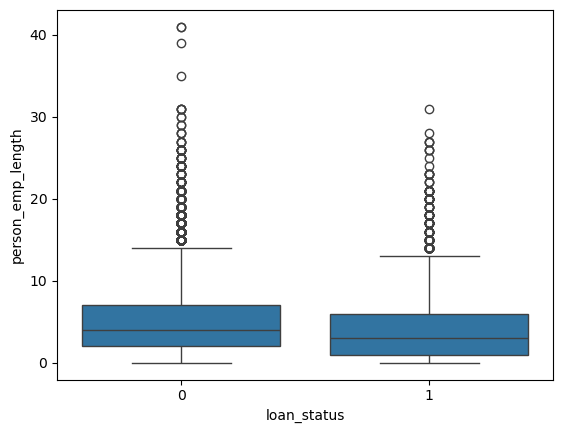

In [85]:
sns.boxplot(x=df['loan_status'],y=df['person_emp_length'])

In [86]:
pd.crosstab(df['person_home_ownership'],df['loan_status'])

loan_status,0,1
person_home_ownership,,
MORTGAGE,23339,1482
OTHER,74,15
OWN,3095,43
RENT,23785,6809


In [87]:
pd.crosstab(df['loan_grade'],df['loan_status'],normalize='index')

loan_status,0,1
loan_grade,,
A,0.950820,0.049180
B,0.897686,0.102314
C,0.864625,0.135375
D,0.406517,0.593483
E,0.374628,0.625372
F,0.389262,0.610738
G,0.181818,0.818182


<Axes: xlabel='loan_status', ylabel='loan_amnt'>

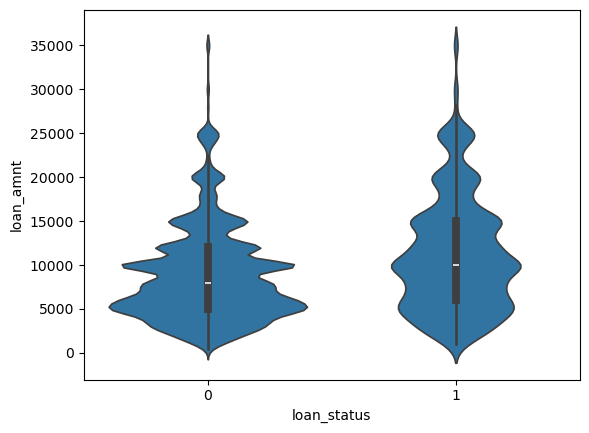

In [88]:
sns.violinplot(y=df['loan_amnt'],x=df['loan_status'])

<Axes: xlabel='loan_status', ylabel='loan_int_rate'>

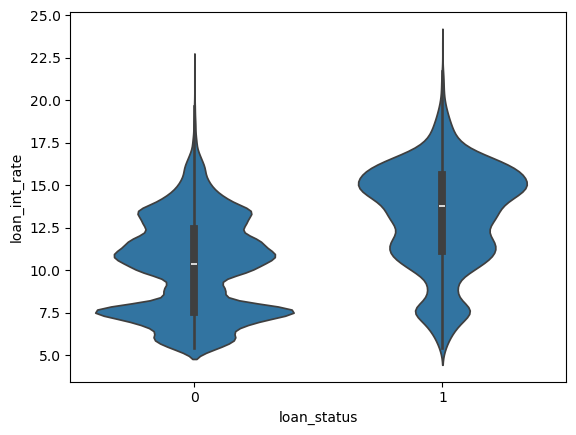

In [89]:
sns.violinplot(y=df['loan_int_rate'],x=df['loan_status'])


<Axes: xlabel='loan_status', ylabel='loan_percent_income'>

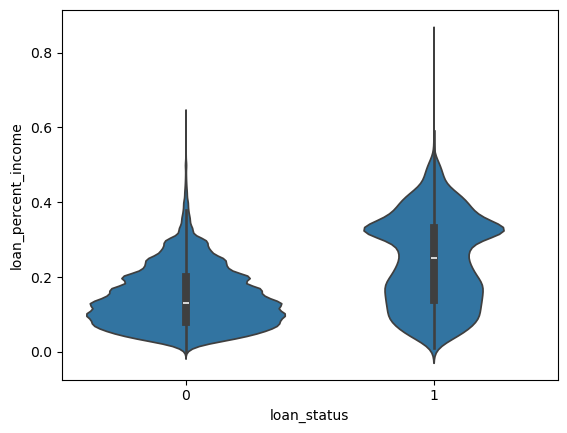

In [90]:
sns.violinplot(y=df['loan_percent_income'],x=df['loan_status'])

In [91]:
pd.crosstab(df['cb_person_default_on_file'],df['loan_status'],normalize='index')

loan_status,0,1
cb_person_default_on_file,,
0,0.884884,0.115116
1,0.701184,0.298816


<Axes: xlabel='loan_status', ylabel='cb_person_cred_hist_length'>

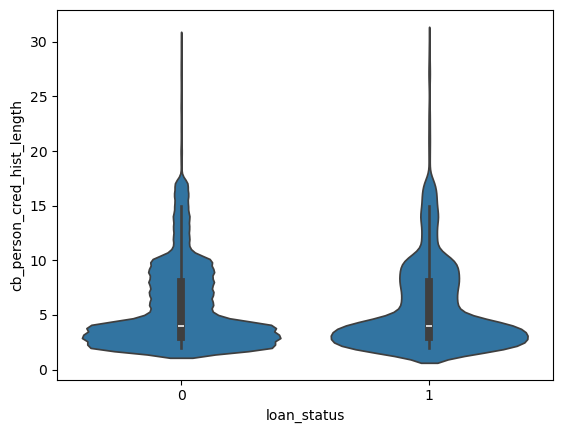

In [92]:
sns.violinplot(x=df['loan_status'],y=df['cb_person_cred_hist_length'])

In [93]:
# Model building

In [94]:
df['loan_status'].value_counts()

loan_status
0    50293
1     8349
Name: count, dtype: int64

In [95]:
transformer = make_column_transformer(
    (OneHotEncoder(drop='first',sparse_output=False),[2,4,5]),
    (PowerTransformer(),[0,1,3,6,7,8,10]),remainder='passthrough'
    ).set_output(transform='pandas')

In [96]:
X, y = df.drop('loan_status',axis=1),df['loan_status']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=2,stratify=df['loan_status'])

In [98]:
# new model with removing outliers
new_df = pd.concat([X_train,y_train],axis=1)

In [99]:
new_df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file       int32
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

In [100]:
def oulier_removal(df,feature):
   q_25 = df[feature].quantile(.25)
   q_75 = df[feature].quantile(.75)
   iqr = q_75 - q_25
   upper_limit = q_75+1.5*iqr
   lower_limit = q_25 - 1.5*iqr
   df = df.drop(df[(df[feature]>upper_limit) | (df[feature]<lower_limit)].index)
   return df


In [101]:
oulier_removal_features = [feature for feature in df.columns if df[feature].nunique()>10]

In [102]:
for outlier_feature in oulier_removal_features:
    print(outlier_feature)
    new_df = oulier_removal(new_df,outlier_feature)

person_age
person_income
person_emp_length
loan_amnt
loan_int_rate
loan_percent_income
cb_person_cred_hist_length


In [103]:
new_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
36493,22,24000,RENT,1.0,VENTURE,B,5000,10.59,0.21,0,4,0
56388,23,90000,RENT,3.0,VENTURE,A,9000,7.90,0.10,0,3,0
11441,26,54000,MORTGAGE,10.0,DEBTCONSOLIDATION,B,10000,12.69,0.19,0,2,0
57489,22,70000,MORTGAGE,3.0,EDUCATION,A,8000,6.91,0.11,0,2,0
4756,22,40000,RENT,6.0,PERSONAL,B,3200,11.99,0.08,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
38391,23,33000,RENT,0.0,EDUCATION,B,2000,11.49,0.06,0,2,0
53861,25,65000,MORTGAGE,2.0,EDUCATION,B,15000,12.42,0.23,0,3,0
43871,24,95000,MORTGAGE,0.0,PERSONAL,C,4000,14.35,0.04,0,3,0
3596,22,45000,RENT,3.0,EDUCATION,B,6000,10.00,0.13,0,4,0


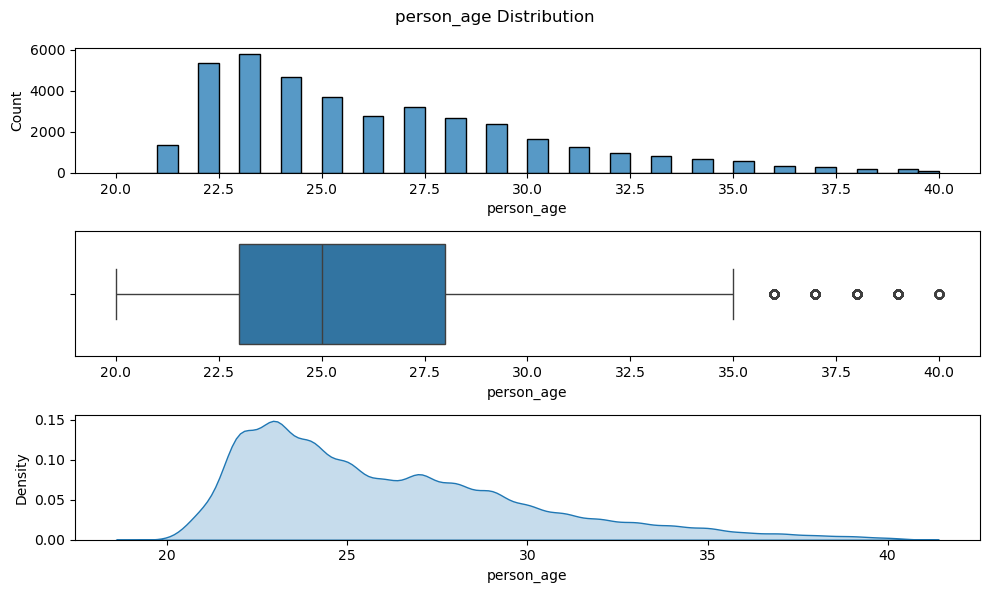

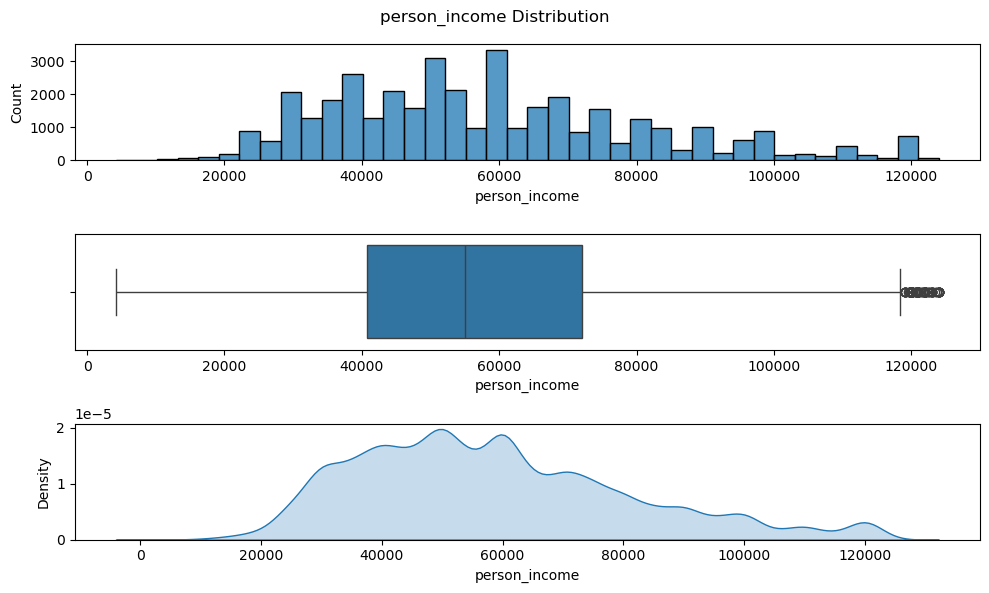

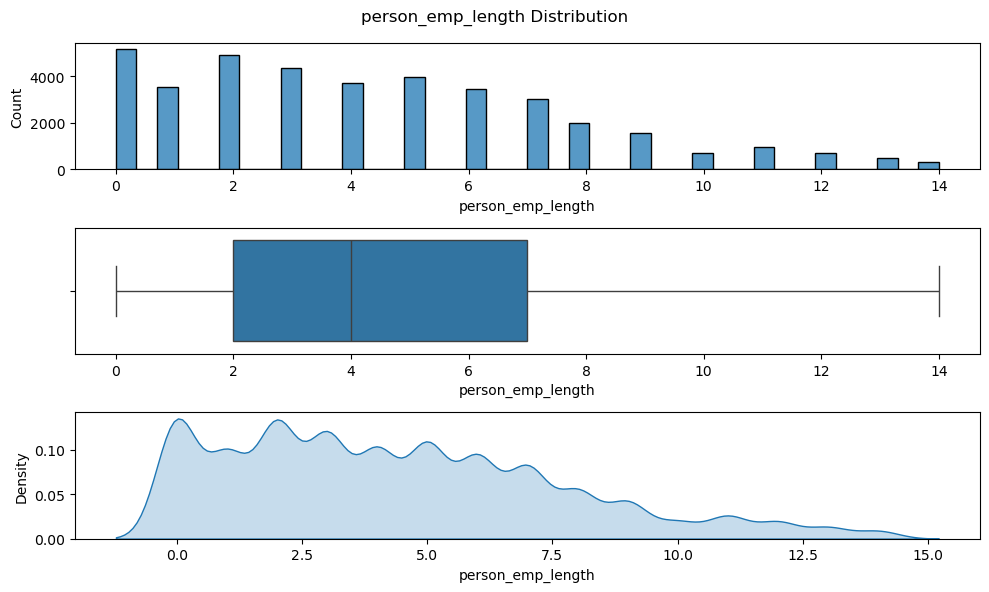

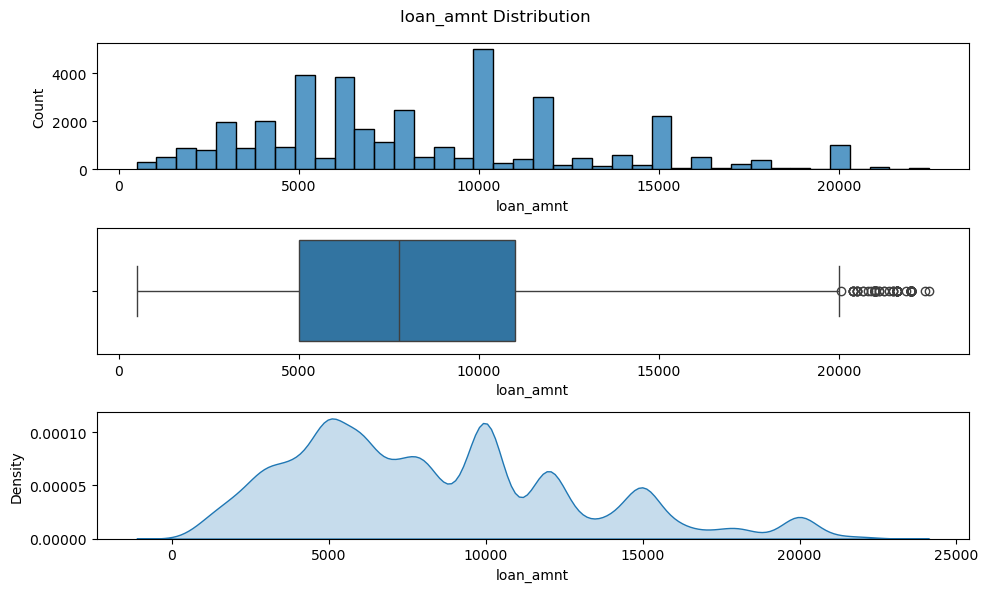

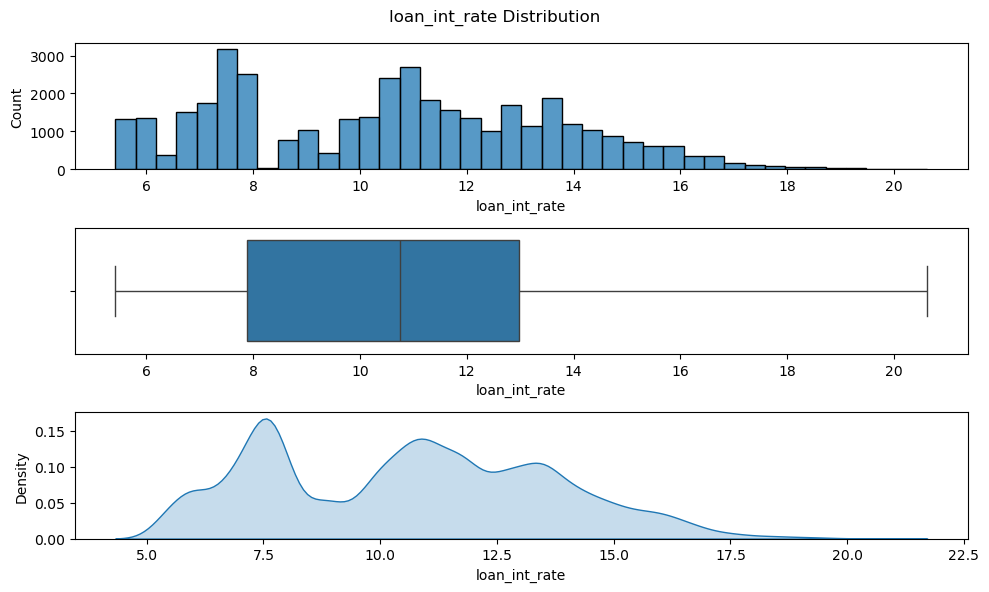

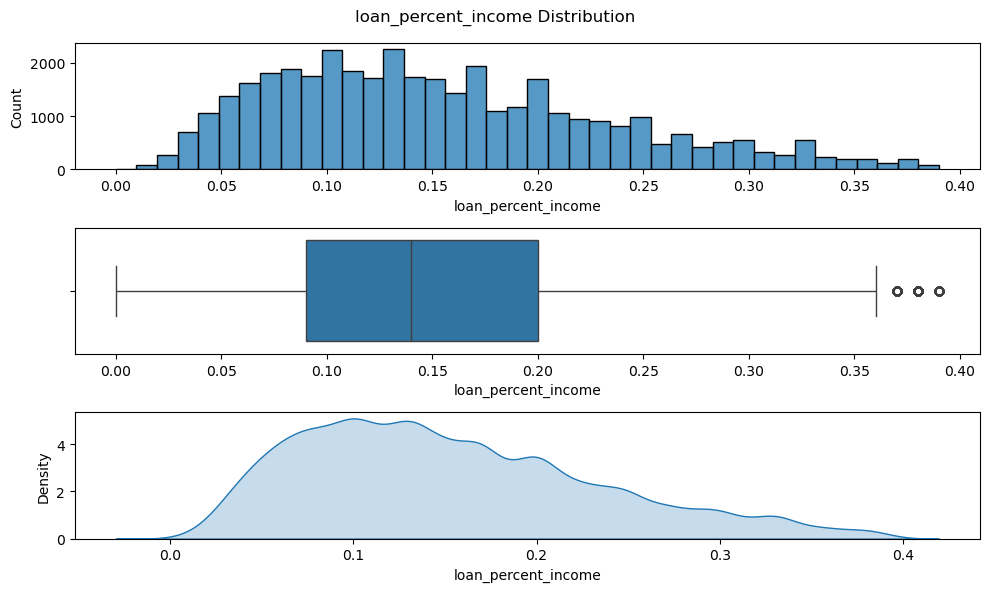

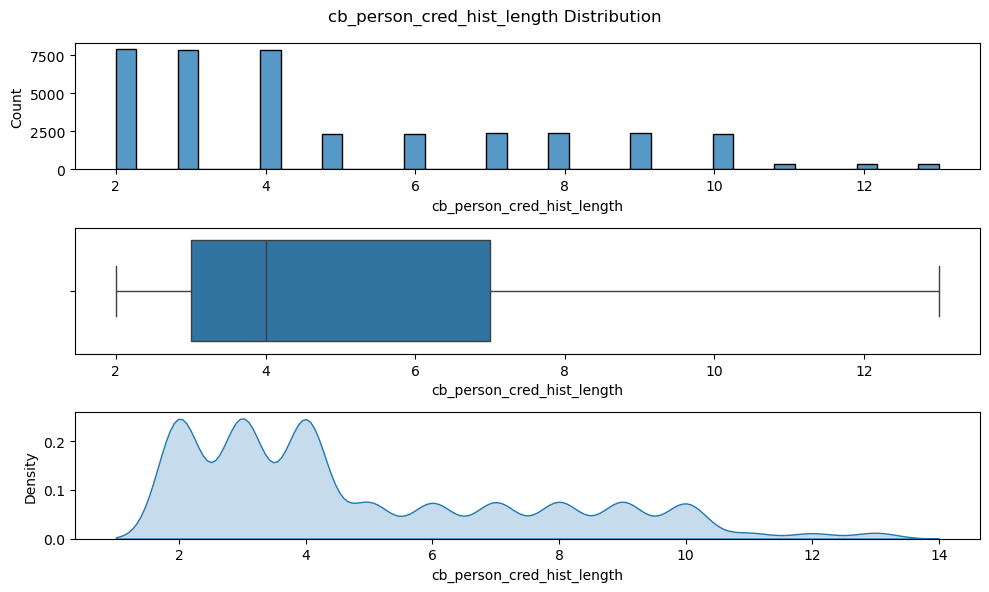

In [104]:
def num_plot(feature=''):
    plt.figure(figsize=(10,6))
    plt.suptitle(f'{feature} Distribution')
    plt.subplot(3,1,1)
    sns.histplot(new_df[feature],bins=40)
    plt.subplot(3,1,2)
    sns.boxplot(new_df[feature],orient='h')
    plt.subplot(3,1,3)
    sns.kdeplot(new_df[feature],fill=True)
    plt.tight_layout()
for i in oulier_removal_features:
    num_plot(i)

In [105]:
y_train_new = new_df['loan_status']
X_train_new = new_df.iloc[:,:-1]

In [106]:
X_train.shape,y_train.shape

((46913, 11), (46913,))

In [107]:
X_train = transformer.fit_transform(X_train)
X_train_new = transformer.fit_transform(X_train_new)

In [145]:
# Model Training & Selection
bbc = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=200,sampling_strategy='not minority',n_jobs=3,verbose=True)

In [146]:
models = [KNeighborsClassifier,SVC,GaussianNB,GradientBoostingClassifier]

In [201]:
for model in models:
    bbc = BalancedBaggingClassifier(estimator=model(),n_estimators=200,sampling_strategy='not minority',n_jobs=3,verbose=True)
    print(cross_val_score(X=X_train,y=y_train,estimator=bbc,scoring='f1'))

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    3.2s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   13.9s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    2.6s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   13.5s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    2.5s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   13.3s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   

[0.62111801 0.61761427 0.61177784 0.617737   0.61253797]


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:  3.3min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:  5.1min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:  2.4min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:  3.9min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:  2.4min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:  3.0min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:  1

[0.67553023 0.6793049  0.67183142 0.67721912 0.67017327]


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.5s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.4s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.4s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.2s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concu

[0.55774885 0.51900393 0.51582141 0.55587869 0.49446167]


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.6s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.4s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.4s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concu

[0.70565302 0.71232877 0.70475583 0.71221399 0.69606903]


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.3s finished


In [147]:
brc = BalancedRandomForestClassifier(sampling_strategy='not minority',
                                     n_jobs=3,
                                     verbose=True,
                                     min_samples_split=40,
                                     n_estimators=200)

In [ ]:
cross_val_score(X=X_train,y=y_train,estimator=brc,scoring='f1')

c:\Users\VICTUS\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\VICTUS\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    1.1s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent work

array([0.71017403, 0.71557186, 0.70333225, 0.71288424, 0.69880298])

In [148]:
votting_models = [
    ('knn',KNeighborsClassifier()),
    ('svc',SVC()),
    ('rt',RandomForestClassifier()),
                  ]

In [149]:
vt = VotingClassifier(estimators=votting_models,voting='hard')

In [150]:
bbc_votting = BalancedBaggingClassifier(estimator=vt,
                                sampling_strategy='not minority',
                                verbose=True,
                                n_jobs=5,
                                n_estimators=100)

In [248]:
cross_val_score(X=X_train,y=y_train,estimator=bbc_votting,scoring='f1',cv=2)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  1.0min remaining:  1.6min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  2.4min remaining:  3.6min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   39.1s remaining:   58.7s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   42.8s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  2.4min remaining:  3.6min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  2.7min finished


array([0.67978669, 0.68407643])

In [151]:
# Stack model
stack_models = [
    ('knn',KNeighborsClassifier()),
    ('svc',SVC()),
    ('rt',RandomForestClassifier()),
                  ]
stacking_model = StackingClassifier(estimators=stack_models,final_estimator=GradientBoostingClassifier())

In [162]:
bbc_stacking = BalancedBaggingClassifier(estimator=stacking_model,
                                sampling_strategy='not minority',
                                verbose=True,
                                n_jobs=-1,
                                n_estimators=100)

In [161]:
cross_val_score(X=X_train,y=y_train,estimator=bbc_stacking,scoring='f1',cv=2)

KeyboardInterrupt: 

In [154]:
cross_val_score(X=X_train_new,y=y_train_new,estimator=bbc_stacking,scoring='f1',cv=2)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  2.9min remaining:  2.9min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  3.0min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  1.9min remaining:  1.9min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  2.1min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  2.9min remaining:  2.9min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  2.9min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  3.5min remaining:  3.5min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  3.9min finished


array([0.73310743, 0.72918351])

In [108]:
# using the model that trained in colab ,since my system is not good enough
import pickle

In [109]:
with open('model.pkl','rb') as f:
    model = pickle.load(f)

c:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.5.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.5.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.5.1. This might lead to br

In [119]:
test = pd.read_csv('test.csv')

In [120]:
test_id = test['id']

In [121]:
test.drop('id',axis=1,inplace=True)

In [122]:
testtr = transformer.transform(test)

In [129]:
testtr['remainder__cb_person_default_on_file'] = testtr['remainder__cb_person_default_on_file'].eq('Y').astype(int)

In [131]:
y_pred = model.predict_proba(testtr)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:  4.0min remaining: 27.9min
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed: 21.6min finished


In [136]:
y_pred = pd.DataFrame(y_pred,columns=[0,1])

In [138]:
y_pred['id'] = test_id

In [143]:
submission_data = y_pred[['id',1]].rename({1:'loan_status'},axis=1)

In [144]:
submission_data.to_csv('')

,id,loan_status
0,58645,0.975319
1,58646,0.046688
2,58647,0.923636
3,58648,0.083940
4,58649,0.399971
...,...,...
39093,97738,0.074265
39094,97739,0.015154
39095,97740,0.131864
39096,97741,0.720268
